In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [12]:
N = []      # Macierz natężeń
G = 0       # Łączna liczba pakietów przesyłanych przez sieć
m = 1024    # Średni rozmiar pakietu [b]
S = nx.Graph() # Graf sieci
for i in range(20):
    N.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    for j in range(20):
        if(i != j):
            N[i][j] = (i + j) % 6
            # N[i][j] = (i + j) % 6 + 3
            G += N[i][j]

In [29]:
def resetGraph():
    allEdges = list(S.edges())
    S.remove_edges_from(allEdges)
    allNodes = list(S.nodes())
    S.remove_nodes_from(allNodes)
    for i in range(20):
        S.add_node(i, destinations=N[i])
    for i in range(19):
        n = ((i + 1) % 20)
        p = ((i + 10) % 20)
        S.add_edges_from([(i, n), (i, p)], c=524288, a=0, p=0.99) # c = 512 kb 
    S.remove_edge(9, 10)
    S.add_edge(19, 10, c=524288, a=0, p=0.99)
    # S.remove_edge(9, 19)
    # S.add_edge(19, 0, c=524288, a=0, p=0.99)

29


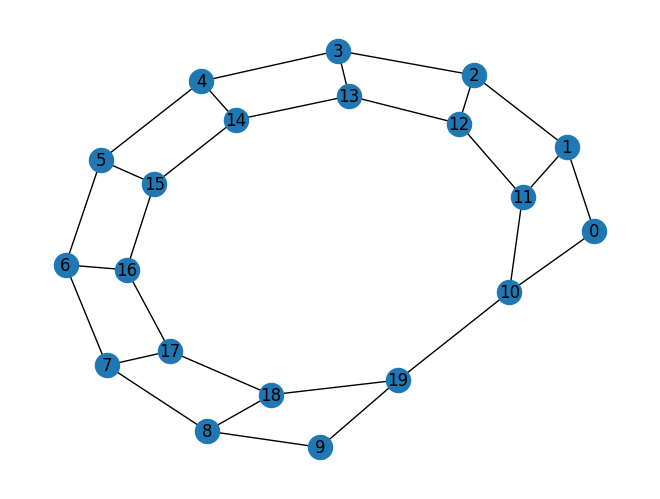

In [30]:
resetGraph()
print(S.number_of_edges())
nx.draw(S, with_labels=True)
# nx.draw_circular(S, with_labels=True)

In [7]:
def simulate():
    toDelete = []
    for e in list(S.edges()):
        edge = S[e[0]][e[1]]
        edge['a'] = 0
        if (random.random() > edge['p']):
            toDelete.append((e[0], e[1]))
    if len(toDelete) > 0:
        # print("Uszkodzone krawędzie: " + str(toDelete))
        S.remove_edges_from(toDelete)
    # else:
        # print("Brak uszkodzonych krawędzi")
    if nx.is_connected(S) == False:
        # print("Graf się rozspójnił!")
        return 1
    for i in range(20):
        nodeDest = S.nodes()[i]['destinations']
        for j in range(20):
            packageLoad = int(nodeDest[j])
            if packageLoad > 0:
                path = nx.shortest_path(S, i, j)
                prevNode = path.pop(0)
                for nextNode in path:
                    S[prevNode][nextNode]['a'] += packageLoad
                    if S[prevNode][nextNode]['a'] * m > S[prevNode][nextNode]['c']:
                        # print("Przekroczono dostępną przepustowość na krawędzi " + str(e[0]) + " <-> " + str(e[1]))
                        return 2
                    prevNode = nextNode
    return 0                 

In [18]:
graphNotConnectedCount = 0
capacityOverflowCount = 0
T_maxOverflow = 0
successCount = 0
numberOfTries = 10000
for a in range(numberOfTries):
    resetGraph()
    S.add_edge(0, 9, c=524288, a=0, p=0.99)       # Krawędzi dodane w ramach ostatniego podpunktu
    S.add_edge(10, 13, c=524288, a=0, p=0.99)
    ret = simulate()
    if ret == 0:
        T_avg = 0
        SUM_e = 0
        for e in list(S.edges()):
            edge = S[e[0]][e[1]]
            dividor = (edge['c'] / m - edge['a'])
            if dividor != 0:
                SUM_e += edge['a'] / dividor
            else:
                SUM_e += edge['a'] / 0.000001
        T_avg = SUM_e / G
        # print("T = " + str(T_avg))
        # print("Symulacja zakończona powodzeniem")
        if T_avg > 0.025:
            T_maxOverflow +=1
        else:
            successCount += 1
    elif ret == 1:
        graphNotConnectedCount += 1
    elif ret == 2:
        capacityOverflowCount += 1
    # else:
    #     print("Symulacja zakończona niepowodzeniem")
print("Prawdopodobieństwo sukcesu: " + str(successCount / numberOfTries * 100) + "%")

Prawdopodobieństwo sukcesu: 99.98%


In [9]:
for r in N:
    print(r)

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1]
[1, 0, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2]
[2, 3, 0, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3]
[3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4]
[4, 5, 0, 1, 0, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]
[5, 0, 1, 2, 3, 0, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0]
[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1]
[1, 2, 3, 4, 5, 0, 1, 0, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2]
[2, 3, 4, 5, 0, 1, 2, 3, 0, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3]
[3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4]
[4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 3, 4, 5, 0, 1, 2, 3, 4, 5]
[5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 0, 5, 0, 1, 2, 3, 4, 5, 0]
[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1]
[1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 3, 4, 5, 0, 1, 2]
[2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 0, 5, 0, 1, 2, 3]
[3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4]
[4, 5, 0, 1, 2, 3, 4, 5,